In [ ]:
# This code does the piecewise interploation of degree 1 on an exponential function with two dependent variables in 2D space


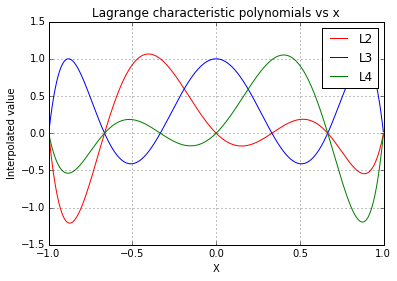

In [1]:


######Problem 2 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# These are the simplied charact. lagrange polynomial, y2 represents l2 and so on.. 

plt.figure(1)
def y2(x):
    return 243./16*((x*x-1)*(x*x-4./9)*(x-1./3)*x)
def y3(x):
    return -81./4*((x*x-1)*(x*x-4./9)*(x*x-1./9))
def y4(x):
    return 243/16*((x*x-1)*(x*x-4./9)*(x+1./3)*x)

x = np.arange(-1,1,0.001)

plt.grid(True)
plt.plot(x,y2(x),'r',label='L2')
plt.plot(x,y3(x),'b',label='L3')
plt.plot(x,y4(x),'g',label='L4')
plt.xlabel('X');plt.ylabel('Interpolated value')
plt.title('Lagrange characteristic polynomials vs x ',fontsize=12,color='black')
plt.legend( loc='upper right')












Problem 3

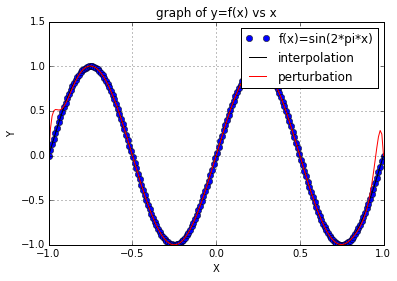

In [2]:
##### Problem 3
plt.figure(2)
import numpy as np
import matplotlib.pyplot as plt 
def f1(x):
        return np.sin(2*np.pi*x)

x = np.linspace(-1.0,1.0,200)
x1 = np.linspace(-1,1,22)
y1 = f1(x1)
y_pert=np.array(22*[0.])
import random
for i in range(0,22):
          pert= random.uniform(0,0.001)
          y_pert[i] = y1[i]+ pert
sum1=np.array(200*[0.])
sum1_pert=np.array(200*[0.])
#x2=np.array([-0.9, 0.9])
for k in range(0,200):
        M=np.array(22*[1.])
        for i in range(0,22):
                for j in range(0,22):
                        if(j!=i):
                                #if(x1[j]!=x2[k]):
                                L= (x[k]-x1[j])/(x1[i]-x1[j])
                                M[i] = M[i]*L
#               print 'x2[k]=',x2[k], ' M[i]=',M[i], ' sum1[k]=',sum1[k]
                sum1[k] = sum1[k]+M[i]*y1[i]
                sum1_pert[k] = sum1_pert[k]+M[i]*y_pert[i]
#print sum1[0], sum1[1], f1(-0.9), f1(0.9)
plt.grid(True)
plt.plot(x,f1(x),'bo',label='f(x)=sin(2*pi*x)')
plt.plot(x,sum1,'k',label='interpolation')
plt.plot(x,sum1_pert,'r',label='perturbation')
plt.legend(loc='upper right')
plt.title('graph of y=f(x) vs x ',fontsize=12,color='black')
plt.xlabel('X')
plt.ylabel('Y');
plt.show()

Problem 4

In [27]:
%matplotlib inline

In [3]:
#####################################################################################
# this is a function which calculates charac. lagrange polynomial
# for the refrence triangle
#####################################################################################
def lagr_tri(order,x,y):
	if order==0:
		l=1-x-y
	elif order==1:
		l=x
	else:
		l=y
	return l

In [4]:
#####################################################################################
# this is a function which finds the global node id of the 
# local refrence triangle
#####################################################################################
def tri_connect(elem_id, loc_node):
	global m 
	global n
	
	if elem_id<(n-1)*(n-1):
		#differ = elem_id - (n-1) 
		index= elem_id/ (n-1)
		if loc_node==0:
			glob_node= m[elem_id+index,:]
		elif loc_node==1:
			glob_node=m[elem_id+1+index,:]
		else:
			glob_node=m[elem_id+n+index,:]
	else:
		differ = elem_id - (n-1) * (n-1) 
		index= differ/ (n-1)
		#index= ( elem_id - (n-1) * (n-1) )//(n-1)
		if loc_node==0:
			glob_node= m[index+differ+n+1,:]
		elif loc_node==1:
			glob_node=m[index+differ+n,:]
		else:
			glob_node=m[index+differ+1,:]	
	return glob_node

In [5]:
#####################################################################################
# This is a function which 
# Calculates the function value at the nodes provided
#####################################################################################

def calc_function(x,y):
	f= np.exp(-(x**2 +y**2) )
	return f

In [13]:
#####################################################################################

# This is the main program  
# 
#####################################################################################


# initializing some variables to be used later.
global n # number of divisions in x or y axis
n= 9
x = np.linspace(-1,1,n)
y=np.linspace(-1,1,n)

global m # number of nodes
m=np.zeros((81,2))			# all nodes 
z=np.zeros((3,2))			# triangle node points 
lag_glob=np.zeros((3))		# lagrange charac. global polynomial function 
b=np.zeros((128,2))			# b vector 
lagr_poly=np.zeros((128))    # global polynomial interpolated value
inverse_func= np.zeros((1,2)) # inverse function = B^-1 *(x-b)
inside_elem_node= np.zeros((128,2))	
X= np.zeros((128))
Y= np.zeros((128))	
pert= .03 				# a constant to be used to dislocate interpolation points 

# defining all the coordinates of the nodes
for ii in xrange(n):
		for jj in xrange(n):
				m[9*ii+jj][0]= x[jj]
				m[9*ii+jj][1]= y[ii]


#print tri_connect(74,1)

# B matrix for the first shape triangle 
B_odd = np.zeros((2,2))
B_odd[:,0] = np.transpose([m[1][0]-m[0][0], m[1][1]-m[0][1]])
B_odd[:,1] = np.transpose([m[9][0]-m[0][0], m[9][1]-m[0][1]])
#print B_odd
inv_B_odd= np.linalg.inv(B_odd)

# B matrix for the second shape triangle 
B_even = np.zeros((2,2))
B_even[:,0] = np.transpose([m[9][0]-m[10][0], m[9][1]-m[10][1]])
B_even[:,1] = np.transpose([m[1][0]-m[10][0], m[1][1]-m[10][1]])
inv_B_even= np.linalg.inv(B_even)
print 'm = ',m[10][:], m[9][:], m[1][:]
print inv_B_even


for ii in range(0,128):
    b[ii][:]= tri_connect(ii,0) # b values is [x1,y1] which changes for every triangle
 
    x1=tri_connect(ii,0)
    if ii<(n-1)*(n-1): 
        inside_elem_node[ii,0]= x1[0] + pert
        inside_elem_node[ii,1]= x1[1] + pert
        inverse_func= np.dot( inv_B_odd, ( np.subtract(inside_elem_node[ii][:], b[ii][:],) ) )  
    else: 
        inside_elem_node[ii,0]= x1[0] - pert
        inside_elem_node[ii,1]= x1[1] - pert
        inverse_func= np.dot( inv_B_even, ( np.subtract(inside_elem_node[ii][:], b[ii][:],) ) )
#    if ii==64:
#        print inverse_func, inv_B_even, inv_B_odd, inside_elem_node[ii][:], b[ii][:], np.subtract(inside_elem_node[ii][:], b[ii][:],)
    for jj in range(0,3):
        z[jj][:]= tri_connect(ii,jj)
        lag_glob[jj]= lagr_tri(jj,inverse_func[0],inverse_func[1])
        #print ii, jj, inverse_func, lag_glob[jj], z[jj][:]

	lagr_poly[ii] = lag_glob[0]* calc_function(z[0][0],z[0][1]) + lag_glob[1]* calc_function(z[1][0],z[1][1]) + lag_glob[2]* calc_function(z[2][0],z[2][1])
    if ii==36:
        print calc_function(z[0][0],z[0][1]), calc_function(z[1][0],z[1][1]), calc_function(z[2][0],z[2][1])
#print inside_elem_node
#print lagr_poly
#print inside_elem_node

m =  [-0.75 -0.75] [-1.   -0.75] [-0.75 -1.  ]
[[-4. -0.]
 [-0. -4.]]
1.0 0.939413062813 0.939413062813


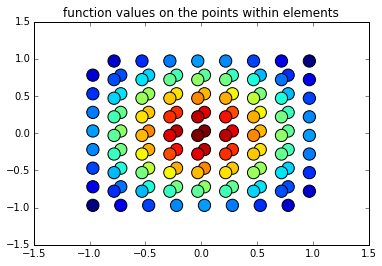

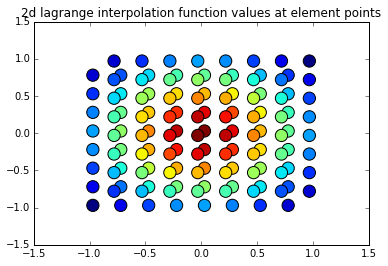

In [26]:
#################################
# plotting the resutls
#################################

plt.figure(1)

Z = np.zeros(128)
for ii in range(128):
	Z[ii] = calc_function(inside_elem_node[ii,0],inside_elem_node[ii,1])

plt.scatter(inside_elem_node[:,0],inside_elem_node[:,1], c=Z, s=150, alpha=1.0)
plt.title('function values on the points within elements ',fontsize=12,color='black')

plt.figure(2)
plt.scatter(inside_elem_node[:,0], inside_elem_node[:,1], c=lagr_poly, s=150.0, alpha=1.0)
plt.title('2d lagrange interpolation function values at element points ',fontsize=12,color='black')
plt.show()

